<a href="https://colab.research.google.com/github/Gregory-lab-eng/python_Vistula/blob/main/Lab4_Math_Strakhov_75209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

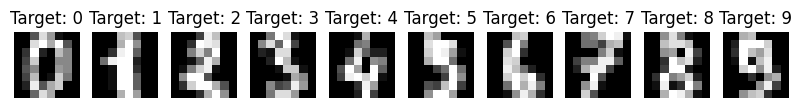

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
df['target'] = digits.target

fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i in range(10):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Target: {digits.target[i]}')
plt.show()



In [ ]:
image = cv2.imread("/content/7.jpg", cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Nieudane pobranie pliku. Sprawdź ścieżkę dostępu.")
    exit()


In [ ]:
# Przetwórz obraz do 8x8 pikseli (aby zachować zgodność z danymi w bazie cyfr)
resized_image = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA) # NEAREST
# Odwróć kolory colory, jeśli tło obrazu jest białe a cyfra czarna)
resized_image = 255 - resized_image

# unormalizuj wartość piksela w skali (0 – 16)  pixel values to match the digits (0–16)
normalized_image = (resized_image / resized_image.max()*16).astype(int)


Tablica pikseli (po dopasowaniu wymiarów względem danych w bazie)
[[ 0  9 11 11 12 12 16  0]
 [ 0  0  0  0  0  6 10  0]
 [ 0  0  0  0  5 11  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0 12  3  0  0  0]
 [ 0  0  7  8  0  0  0  0]
 [ 0  1 14  0  0  0  0  0]
 [ 0  5  1  0  0  0  0  0]]


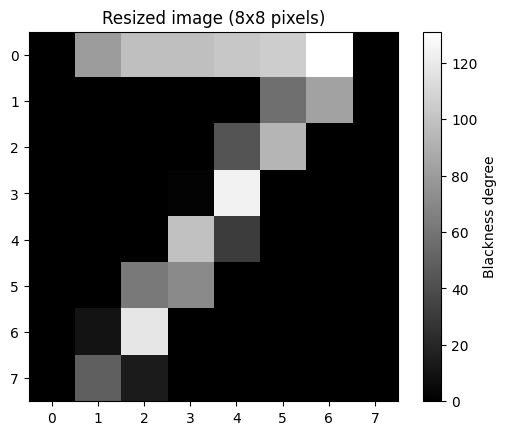

In [ ]:
print("Tablica pikseli (po dopasowaniu wymiarów względem danych w bazie)")
print(normalized_image)

# zobrazowanie tablicy pikseli jako obrazu własnej cyfry
plt.imshow(resized_image, cmap='gray')
plt.title("Resized image (8x8 pixels)")
plt.colorbar(label="Blackness degree")
plt.show()

# Załadowanie obrazu cyfr i ujawnienie parametrów opisujących cyfry
digits = load_digits()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Konwertowanie obrazu do formatu kompatybilnego z modelem
input_image = resized_image.flatten().reshape(1, -1)

# Normalization of input values (to 0–16, as in dataset digits)
input_image_normalized = (input_image / 16)

# Przewidywana cyfra po odczytaniu i zastosowaniu klasyfikacji k-NN
predicted_label = knn.predict(input_image_normalized)
print(f"Rozpoznana cyfra: {predicted_label[0]}")


Rozpoznana cyfra: 7
